<a href="https://colab.research.google.com/github/RoyElkabetz/Tensor-Networks-Simple-Update/blob/main/notebooks/AFH_peps_state.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Antiferromagnetic Heisenberg Model PEPS representation 
In This simulation we find the ground state energy and PEPS representation of a $n\times n$ Antiferromagnetic Heisenberg model with periodic boundary conditions.

In [8]:
# If running from google colab change to TRUE
run_from_colab = False  # True if using google colab

### Cloning the latest tnsu repo from github
You can clone the latest `tnsu` repo from github or run 
```
!pip install tnsu
```

In [9]:
import sys
import os

if run_from_colab:
    # clone the git reposetory
    !git clone https://github.com/RoyElkabetz/Tensor-Networks-Simple-Update

    # add path to .py files for import
    sys.path.insert(1, "/content/Tensor-Networks-Simple-Update/src")

    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    
    # path for saving the networks
    save_path = '/content/gdrive/MyDrive/tmp'
else:
    # clone the git reposetory
    !git clone https://github.com/RoyElkabetz/Tensor-Networks-Simple-Update
    
    # add path to .py files for import
    sys.path.insert(1, "Tensor-Networks-Simple-Update/src")
    
    # path for saving the networks
    save_path = '../tmp/networks'
    
if not os.path.exists(save_path):
    os.makedirs(save_path)

Cloning into 'Tensor-Networks-Simple-Update'...
remote: Enumerating objects: 962, done.
remote: Counting objects: 100% (180/180), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 962 (delta 102), reused 127 (delta 52), pack-reused 782
Receiving objects: 100% (962/962), 9.47 MiB | 2.22 MiB/s, done.
Resolving deltas: 100% (560/560), done.


### Finding the ground state with Tensor Network Simple Update

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tnsu.tensor_network import TensorNetwork
import tnsu.simple_update as su
import tnsu.structure_matrix_constructor as smc


np.random.seed(216)

# Pauli matrices
pauli_x = np.array([[0, 1],
                    [1, 0]])
pauli_y = np.array([[0, -1j],
                    [1j, 0]])
pauli_z = np.array([[1, 0],
                    [0, -1]])
s_i = [pauli_x / 2., pauli_y / 2., pauli_z / 2.]
s_j = [pauli_x / 2., pauli_y / 2., pauli_z / 2.]
s_k = [pauli_x / 2.]

# The Tensor Network structure matrix
n = 2
structure_matrix = smc.square_peps_pbc(n)
print(f'There are {structure_matrix.shape[1]} edges, and {structure_matrix.shape[0]} tensors')

# AFH Hamiltonian interaction parameters
j_ij = [1.] * structure_matrix.shape[1]

# maximal bond dimension
d_max_ = [4]

# convergence error between consecutive lambda weights vectors
error = 1e-5

# maximal number of SU iterations
max_iterations = 200

# time intervals for the ITE
dts = [0.1, 0.01, 0.001, 0.0001, 0.00001]

# magnetic field weight (if 0, there is no magnetic field)
h_k = 0.

energies = []

# Run Simple Update
for d_max in d_max_:
    # create Tensor Network name for saving
    network_name = 'AFH_' + str(n) + 'x' + str(n) + '_pbc_' + 'D_' + str(d_max)

    # create the Tensor Network object
    AFH_TN = TensorNetwork(structure_matrix=structure_matrix,
                           virtual_dim=2,
                           network_name=network_name,
                           dir_path=save_path)

    # create the Simple Update environment
    AFH_TN_su = su.SimpleUpdate(tensor_network=AFH_TN,
                                dts=dts,
                                j_ij=j_ij,
                                h_k=h_k,
                                s_i=s_i,
                                s_j=s_j,
                                s_k=s_k,
                                d_max=d_max,
                                max_iterations=max_iterations,
                                convergence_error=error,
                                log_energy=True,
                                print_process=True)

    # run Simple Update algorithm over the Tensor Network state
    AFH_TN_su.run()

    # compute the energy per-site observable
    energy = AFH_TN_su.energy_per_site()
    print(f'| D max: {d_max} | Energy: {energy}\n')
    energies.append(energy)

    # save the tensor network
    AFH_TN.save_network()


There are 8 edges, and 4 tensors
| D max:  4 | dt: 0.100000 | iteration:     2/  200 | convergence error:  0.0344080903 | energy per-site:    0.38804072270 | iteration time:   0.2 sec | tot time:    0.0 min
| D max:  4 | dt: 0.100000 | iteration:     4/  200 | convergence error:  0.0538756849 | energy per-site:    0.20907661590 | iteration time:   0.2 sec | tot time:    0.0 min
| D max:  4 | dt: 0.100000 | iteration:     6/  200 | convergence error:  0.0649732464 | energy per-site:   -0.01584804840 | iteration time:   0.1 sec | tot time:    0.0 min
| D max:  4 | dt: 0.100000 | iteration:     8/  200 | convergence error:  0.0891607811 | energy per-site:   -0.19227948630 | iteration time:   0.2 sec | tot time:    0.0 min
| D max:  4 | dt: 0.100000 | iteration:    10/  200 | convergence error:  0.0982049084 | energy per-site:   -0.35103965740 | iteration time:   0.2 sec | tot time:    0.0 min
| D max:  4 | dt: 0.100000 | iteration:    12/  200 | convergence error:  0.0278905764 | energy p

| D max:  4 | dt: 0.100000 | iteration:    96/  200 | convergence error:  0.0005459932 | energy per-site:   -0.62926198070 | iteration time:   0.1 sec | tot time:    0.1 min
| D max:  4 | dt: 0.100000 | iteration:    98/  200 | convergence error:  0.0005753388 | energy per-site:   -0.62927170350 | iteration time:   0.1 sec | tot time:    0.1 min
| D max:  4 | dt: 0.100000 | iteration:   100/  200 | convergence error:  0.0006250537 | energy per-site:   -0.62928269450 | iteration time:   0.1 sec | tot time:    0.1 min
| D max:  4 | dt: 0.100000 | iteration:   102/  200 | convergence error:  0.0006763822 | energy per-site:   -0.62929470040 | iteration time:   0.1 sec | tot time:    0.1 min
| D max:  4 | dt: 0.100000 | iteration:   104/  200 | convergence error:  0.0007261831 | energy per-site:   -0.62930736700 | iteration time:   0.1 sec | tot time:    0.1 min
| D max:  4 | dt: 0.100000 | iteration:   106/  200 | convergence error:  0.0007714883 | energy per-site:   -0.62932041380 | itera

| D max:  4 | dt: 0.100000 | iteration:   192/  200 | convergence error:  0.0008079233 | energy per-site:   -0.63002827130 | iteration time:   0.1 sec | tot time:    0.2 min
| D max:  4 | dt: 0.100000 | iteration:   194/  200 | convergence error:  0.0008067650 | energy per-site:   -0.63006322810 | iteration time:   0.1 sec | tot time:    0.2 min
| D max:  4 | dt: 0.100000 | iteration:   196/  200 | convergence error:  0.0008079147 | energy per-site:   -0.63009974150 | iteration time:   0.2 sec | tot time:    0.2 min
| D max:  4 | dt: 0.100000 | iteration:   198/  200 | convergence error:  0.0008227848 | energy per-site:   -0.63013674720 | iteration time:   0.1 sec | tot time:    0.2 min
| D max:  4 | dt: 0.010000 | iteration:     2/  200 | convergence error:  0.0007576875 | energy per-site:   -0.64785910750 | iteration time:   0.2 sec | tot time:    0.2 min
| D max:  4 | dt: 0.010000 | iteration:     4/  200 | convergence error:  0.0006994897 | energy per-site:   -0.64800798600 | itera

| D max:  4 | dt: 0.010000 | iteration:    90/  200 | convergence error:  0.0001307778 | energy per-site:   -0.64922285940 | iteration time:   0.1 sec | tot time:    0.3 min
| D max:  4 | dt: 0.010000 | iteration:    92/  200 | convergence error:  0.0001293911 | energy per-site:   -0.64922659150 | iteration time:   0.1 sec | tot time:    0.3 min
| D max:  4 | dt: 0.010000 | iteration:    94/  200 | convergence error:  0.0001281444 | energy per-site:   -0.64923027740 | iteration time:   0.1 sec | tot time:    0.3 min
| D max:  4 | dt: 0.010000 | iteration:    96/  200 | convergence error:  0.0001270279 | energy per-site:   -0.64923393030 | iteration time:   0.1 sec | tot time:    0.3 min
| D max:  4 | dt: 0.010000 | iteration:    98/  200 | convergence error:  0.0001260319 | energy per-site:   -0.64923756190 | iteration time:   0.1 sec | tot time:    0.3 min
| D max:  4 | dt: 0.010000 | iteration:   100/  200 | convergence error:  0.0001251464 | energy per-site:   -0.64924118330 | itera

| D max:  4 | dt: 0.010000 | iteration:   186/  200 | convergence error:  0.0001211658 | energy per-site:   -0.64941710370 | iteration time:   0.1 sec | tot time:    0.5 min
| D max:  4 | dt: 0.010000 | iteration:   188/  200 | convergence error:  0.0001209014 | energy per-site:   -0.64942021430 | iteration time:   0.1 sec | tot time:    0.5 min
| D max:  4 | dt: 0.010000 | iteration:   190/  200 | convergence error:  0.0001206383 | energy per-site:   -0.64942323470 | iteration time:   0.1 sec | tot time:    0.5 min
| D max:  4 | dt: 0.010000 | iteration:   192/  200 | convergence error:  0.0001203771 | energy per-site:   -0.64942616810 | iteration time:   0.1 sec | tot time:    0.5 min
| D max:  4 | dt: 0.010000 | iteration:   194/  200 | convergence error:  0.0001201180 | energy per-site:   -0.64942901790 | iteration time:   0.1 sec | tot time:    0.5 min
| D max:  4 | dt: 0.010000 | iteration:   196/  200 | convergence error:  0.0001198609 | energy per-site:   -0.64943178750 | itera

| D max:  4 | dt: 0.001000 | iteration:    86/  200 | convergence error:  0.0000144694 | energy per-site:   -0.65129969470 | iteration time:   0.1 sec | tot time:    0.6 min
| D max:  4 | dt: 0.001000 | iteration:    88/  200 | convergence error:  0.0000144456 | energy per-site:   -0.65130004970 | iteration time:   0.1 sec | tot time:    0.6 min
| D max:  4 | dt: 0.001000 | iteration:    90/  200 | convergence error:  0.0000144222 | energy per-site:   -0.65130040260 | iteration time:   0.1 sec | tot time:    0.6 min
| D max:  4 | dt: 0.001000 | iteration:    92/  200 | convergence error:  0.0000143986 | energy per-site:   -0.65130075350 | iteration time:   0.1 sec | tot time:    0.6 min
| D max:  4 | dt: 0.001000 | iteration:    94/  200 | convergence error:  0.0000143740 | energy per-site:   -0.65130110240 | iteration time:   0.1 sec | tot time:    0.6 min
| D max:  4 | dt: 0.001000 | iteration:    96/  200 | convergence error:  0.0000143482 | energy per-site:   -0.65130144940 | itera

| D max:  4 | dt: 0.001000 | iteration:   182/  200 | convergence error:  0.0000134039 | energy per-site:   -0.65131479310 | iteration time:   0.1 sec | tot time:    0.7 min
| D max:  4 | dt: 0.001000 | iteration:   184/  200 | convergence error:  0.0000133855 | energy per-site:   -0.65131507230 | iteration time:   0.1 sec | tot time:    0.7 min
| D max:  4 | dt: 0.001000 | iteration:   186/  200 | convergence error:  0.0000133672 | energy per-site:   -0.65131535040 | iteration time:   0.1 sec | tot time:    0.7 min
| D max:  4 | dt: 0.001000 | iteration:   188/  200 | convergence error:  0.0000133491 | energy per-site:   -0.65131562720 | iteration time:   0.1 sec | tot time:    0.7 min
| D max:  4 | dt: 0.001000 | iteration:   190/  200 | convergence error:  0.0000133313 | energy per-site:   -0.65131590290 | iteration time:   0.1 sec | tot time:    0.7 min
| D max:  4 | dt: 0.001000 | iteration:   192/  200 | convergence error:  0.0000133138 | energy per-site:   -0.65131617740 | itera

### Plot the Results

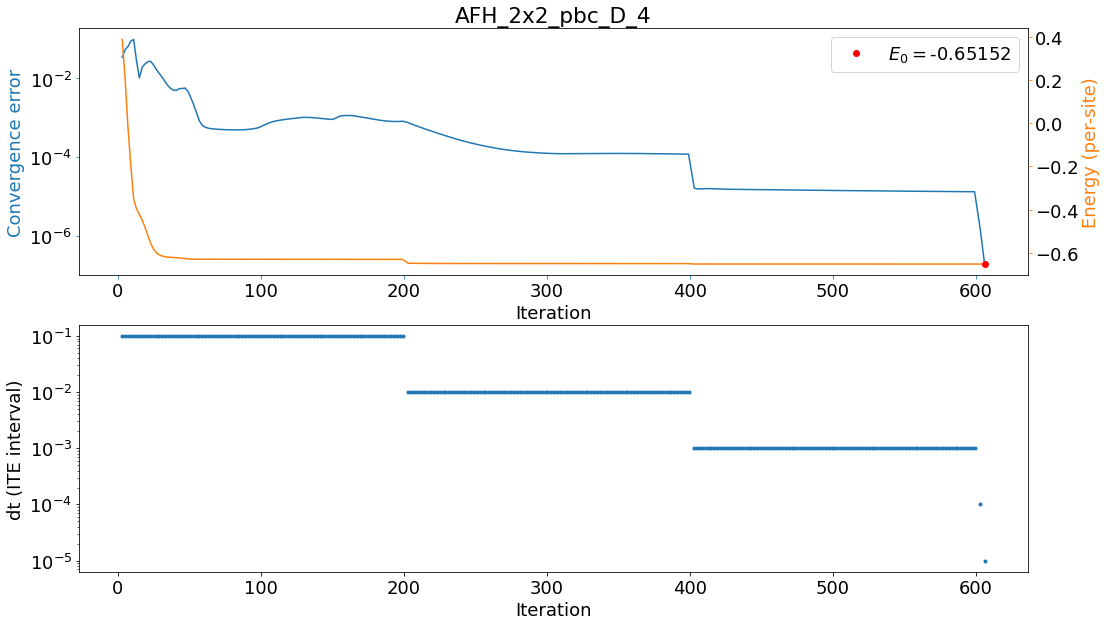

In [11]:
from tnsu.utils import plot_convergence_curve

# plot su convergence / energy curve
plot_convergence_curve(AFH_TN_su)